In [1]:
import jupyter_black

jupyter_black.load()

%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import shap

from shapley import Shapley

/home/lawrence/github/DS-and-ML-Fundamental-Algorithms/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [4]:
shapley = Shapley(model_predictor=rf.predict_proba, X_train=X_train)

In [5]:
def plot_importance(shapley_values: np.ndarray):
    fig, axes = plt.subplots(4, figsize=(8, 20), sharex=True, sharey=True)
    for ax, i in zip(axes, range(shapley_values.shape[0])):
        ax.bar(x=iris.target_names, height=shapley_values[i])
        ax.set_title(iris.feature_names[i])
        ax.set_ylabel("shapley value")
    ax.set_xlabel("targets")

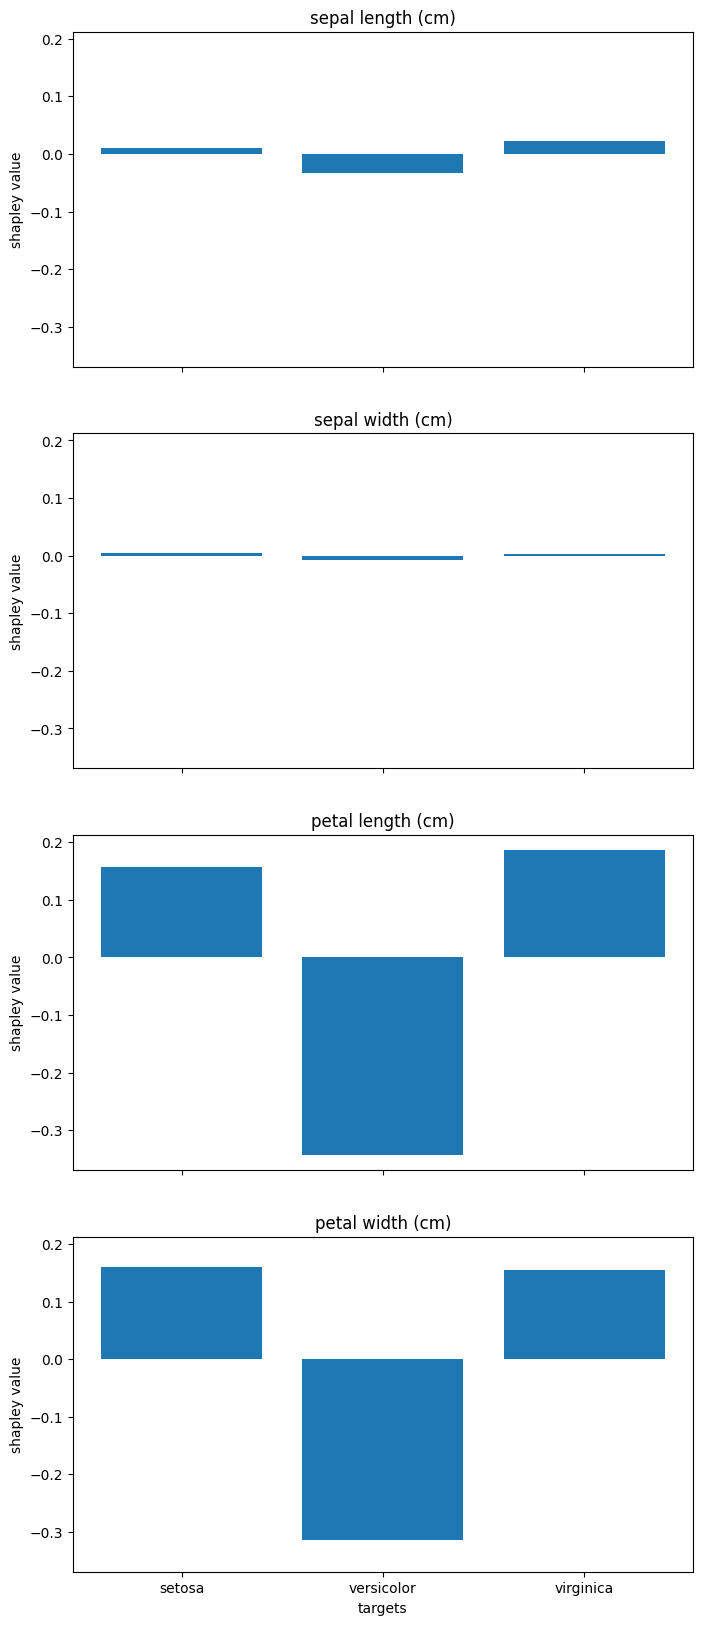

In [6]:
global_shapley_values = np.zeros((len(iris.feature_names), len(iris.target_names)))
for row in X_test:
    global_shapley_values += shapley.get_values(row)
global_shapley_values = global_shapley_values / X_test.shape[0]

plot_importance(shapley_values=global_shapley_values)

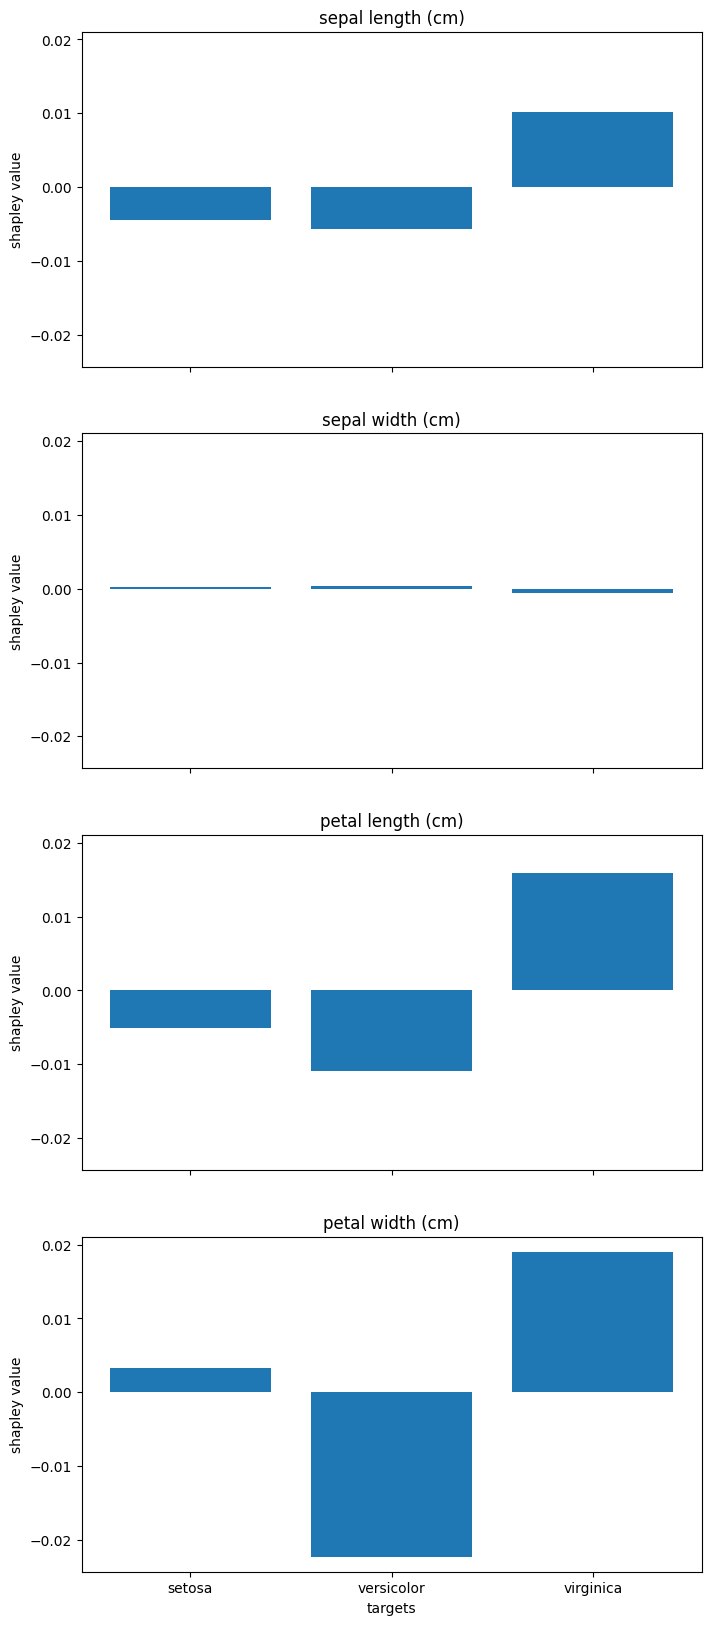

In [7]:
explainer = shap.TreeExplainer(rf)
global_shap_values = explainer.shap_values(X_test).mean(axis=0)

plot_importance(shapley_values=global_shap_values)